## Introduction

In this simple analysis, we are going to find out:

1. Which country is the most polluted in terms of each type of pollution: air and water?
2. What about the most clean countries in terms of both air and water qualities?
3. Is there any outlier in both air and water qualities?
4. Is there underlying relationship between air quality and water qualities?

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "world-cities-air-quality-and-water-polution"

## Loading Dataset and Data Cleaning

In [2]:
# Loading necessary package and dataset

library(gridExtra)
library(ggplot2)
library(tibble)

pollution_df = read_csv("../input/world-cities-air-quality-and-water-polution/cities_air_quality_water_pollution.18-10-2021.csv")

glimpse(pollution_df)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Rows: 3963 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): City, Region, Country
dbl (2): AirQuality, WaterPollution


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Rows: 3,963
Columns: 5
$ City           <chr> "New York City", "Washington, D.C.", "San Francisco", "…
$ Region         <chr> "New York", "District of Columbia", "California", NA, "…
$ Country        <chr> "United States of America", "United States of America",…
$ AirQuality     <dbl> 46.81604, 66.12903, 60.51402, 62.36413, 36.62162, 94.31…
$ WaterPollution <dbl> 49.50495, 49.10714, 43.00000, 28.61272, 61.29944, 12.50…


In [3]:
# Checking missing values

missing_values <- function(df) {
    missing_val <- c()
    for (c in colnames(df)) {
        missing <- sum(is.na(df[[c]]))
        missing_val <- c(missing_val, missing)
    }
    tibble(colnames(df), missing_val)
}

missing_values(pollution_df)

colnames(df),missing_val
<chr>,<int>
City,0
Region,425
Country,0
AirQuality,0
WaterPollution,0


There are 425 missing values on Region column. In this case, we will get rid of Region column because each country has its own unique system in terms of naming the region - some countries don't even have such system.

Also, let's change the measurement of AirQuality to AirPollution by subtracting AirQuality from 100, as the scale is out of 100.

In [4]:
pollution_df_cleaned <- pollution_df %>%
mutate(AirPollution = 100 - AirQuality) %>%
select(-c(Region, AirQuality))

head(pollution_df_cleaned)

City,Country,WaterPollution,AirPollution
<chr>,<chr>,<dbl>,<dbl>
New York City,United States of America,49.50495,53.183962
"Washington, D.C.",United States of America,49.10714,33.870968
San Francisco,United States of America,43.00000,39.485981
Berlin,Germany,28.61272,37.635870
Los Angeles,United States of America,61.29944,63.378378
Bern,Switzerland,12.50000,5.681818


## Data Analysis

#### Top 10 Most Polluted Countries in terms of Air Pollution & Water Pollution

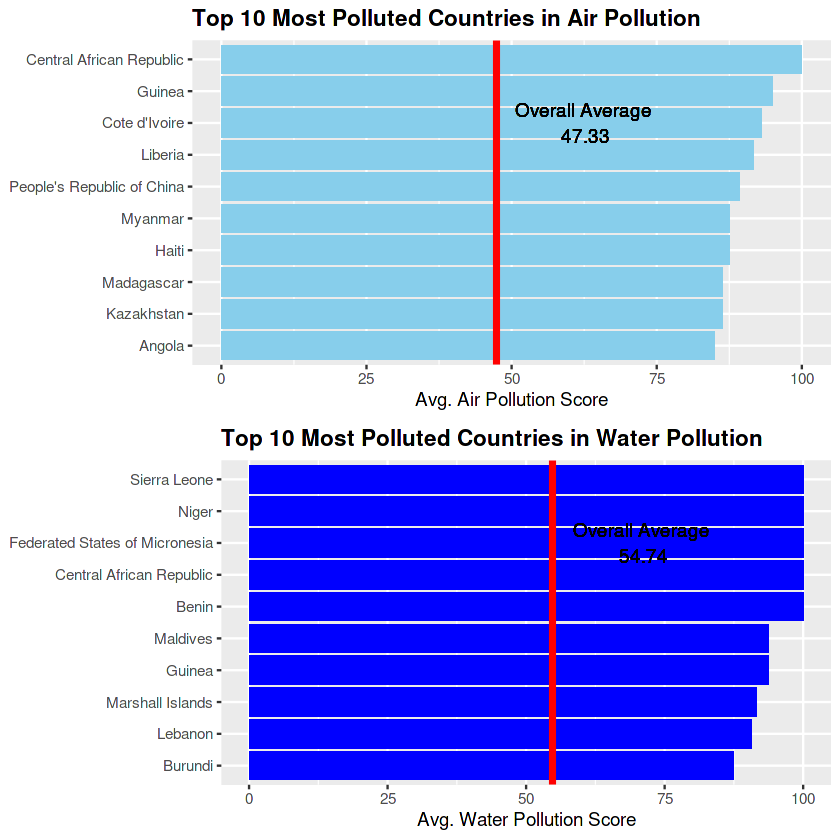

In [5]:
# Which country is the most polluted on average in terms of each air pollution and water pollution?

average_pollution <- pollution_df_cleaned %>%
group_by(Country) %>%
summarise(avg_air_pollution = mean(AirPollution),
          avg_water_pollution = mean(WaterPollution))

# Overall Average of Each Type of Pollution

overall_avg_air_pol <- mean(average_pollution$avg_air_pollution)
overall_avg_water_pol <- mean(average_pollution$avg_water_pollution)

# Top 10 Polluted Countries in terms of Air and Water Pollutions

avg_air_pol <- average_pollution %>% 
arrange(desc(avg_air_pollution)) %>%
head(10) %>%
ggplot(aes(x = reorder(Country, avg_air_pollution), y = avg_air_pollution)) +
geom_col(fill = "skyblue") +
labs(title = "Top 10 Most Polluted Countries in Air Pollution",
     x = NULL,
     y = "Avg. Air Pollution Score") +
geom_hline(yintercept = overall_avg_air_pol, size = 1.5, color = "red") +
geom_text(aes(x = 8, y = overall_avg_air_pol + 15, label = paste("Overall Average\n", round(overall_avg_air_pol, 2)))) +
theme(plot.title = element_text(face = "bold")) +
coord_flip()

avg_water_pol <- average_pollution %>%
arrange(desc(avg_water_pollution)) %>%
head(10) %>%
ggplot(aes(x = reorder(Country, avg_water_pollution), y = avg_water_pollution)) + 
geom_col(fill = "blue") + 
labs(title = "Top 10 Most Polluted Countries in Water Pollution",
     x = NULL,
     y = "Avg. Water Pollution Score") +
geom_hline(yintercept = overall_avg_water_pol, size = 1.5, color = "red") +
geom_text(aes(x = 8, y = overall_avg_water_pol + 16, label = paste("Overall Average\n",round(overall_avg_water_pol, 2)))) +
theme(plot.title = element_text(face = "bold")) +
coord_flip()

grid.arrange(avg_air_pol, avg_water_pol, nrow = 2)

Findings so far:

1. **Central African Republic** is the most polluted country in terms of air pollution.
2. **Sierra Leone**, **Niger**, **Federated State of Micronesia**, **Central African Republic**, and **Benin** are tied as the most polluted countries in terms of water pollution.

#### Top 10 Cleanest Countries in terms of Air Quality & Water Quality

On the contrary, both air quality and water quality scores would be vice versa to pollution scores.

Thus, let's convert pollution scores by subtracting pollution scores from 100.

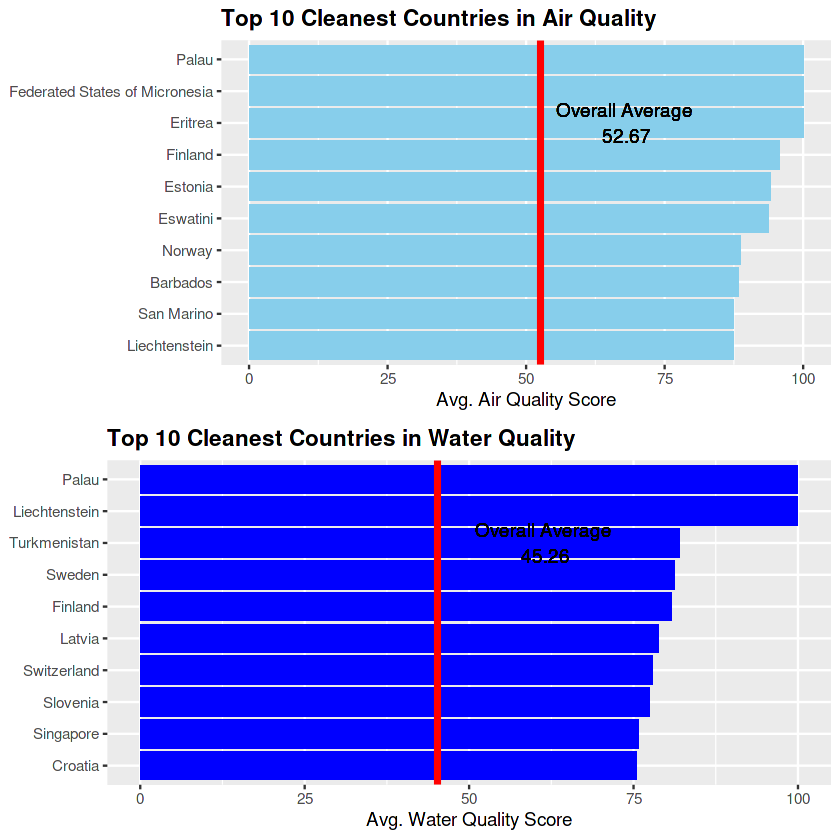

In [6]:
# Creating dataset for quality scores by conversion from pollution score

quality_scores <- pollution_df %>%
mutate(WaterQuality = 100 - WaterPollution) %>%
select(-c(Region, WaterPollution))

# Which country is the cleanest on average in terms of each air quality and water quality?

average_quality <- quality_scores %>%
group_by(Country) %>%
summarise(avg_air_quality = mean(AirQuality),
          avg_water_quality = mean(WaterQuality))

# Overall Average of Each Quality

overall_avg_air_qual <- mean(average_quality$avg_air_quality)
overall_avg_water_qual <- mean(average_quality$avg_water_quality)

# Top 10 Cleanest Countries in terms of Air and Water Qualities

avg_air_qual <- average_quality %>% 
arrange(desc(avg_air_quality)) %>%
head(10) %>%
ggplot(aes(x = reorder(Country, avg_air_quality), y = avg_air_quality)) +
geom_col(fill = "skyblue") +
labs(title = "Top 10 Cleanest Countries in Air Quality",
     x = NULL,
     y = "Avg. Air Quality Score") +
geom_hline(yintercept = overall_avg_air_qual, size = 1.5, color = "red") +
geom_text(aes(x = 8, y = overall_avg_air_qual + 15, label = paste("Overall Average\n", round(overall_avg_air_qual, 2)))) +
theme(plot.title = element_text(face = "bold")) +
coord_flip()

avg_water_qual <- average_quality %>%
arrange(desc(avg_water_quality)) %>%
head(10) %>%
ggplot(aes(x = reorder(Country, avg_water_quality), y = avg_water_quality)) + 
geom_col(fill = "blue") + 
labs(title = "Top 10 Cleanest Countries in Water Quality",
     x = NULL,
     y = "Avg. Water Quality Score") +
geom_hline(yintercept = overall_avg_water_qual, size = 1.5, color = "red") +
geom_text(aes(x = 8, y = overall_avg_water_qual + 16, label = paste("Overall Average\n",round(overall_avg_water_qual, 2)))) +
theme(plot.title = element_text(face = "bold")) +
coord_flip()

grid.arrange(avg_air_qual, avg_water_qual, nrow = 2)

Findings so far:

1. **Palau** is the cleanest country in both air and water qualities.
2. On the contrary to water pollution, **Federated States of Micronesia** is one of the top 3 cleanest countries in air quality.
3. In terms of air quality, **Palau**, **Federated States of Micronesia**, and **Eritrea** are tied as the cleanest countries.
4. In terms of water quality, **Palau** and **Liechtenstein** are tied as the cleanest countries.

#### Outliers: Air Quality vs. Water Quality

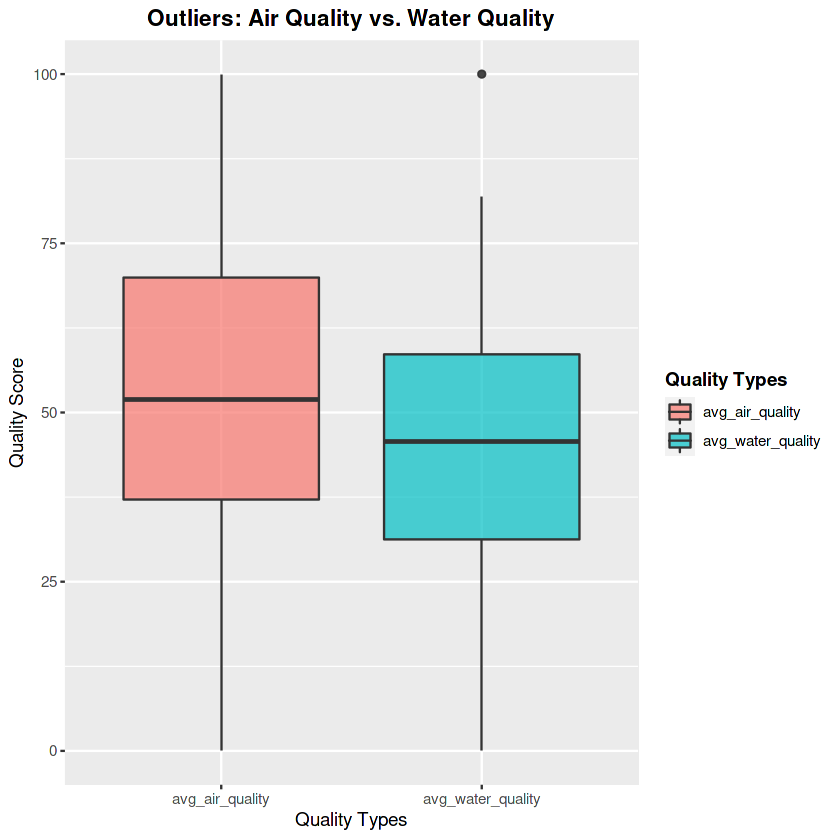

In [7]:
# Creating boxplots to find outliers

average_quality_box <- quality_scores %>%
group_by(Country) %>%
summarise(avg_air_quality = mean(AirQuality),
          avg_water_quality = mean(WaterQuality)) %>%
pivot_longer(cols = starts_with("avg"),
             names_to = "qualities",
             values_to = "value") %>%
ggplot(aes(x = qualities, y = value)) +
geom_boxplot(aes(fill = qualities), alpha = 0.7) +
labs(title = "Outliers: Air Quality vs. Water Quality",
     x = "Quality Types",
     y = "Quality Score") +
guides(fill = guide_legend(title="Quality Types")) +
theme(plot.title = element_text(hjust = 0.5, face = "bold"),
      legend.title = element_text(face = "bold"))


average_quality_box


Findings so far: 

1. Average air quality is close to normal distribution.
2. Average water quality is also somehow close to normal distribution, but has outliers that would be **Palau** and **Liechtenstein**.

#### What kind of relationship do Avg. Air Quality and Avg. Water Quality possess?


Call:
lm(formula = avg_water_quality ~ avg_air_quality, data = average_quality)

Coefficients:
    (Intercept)  avg_air_quality  
        16.3815           0.5482  


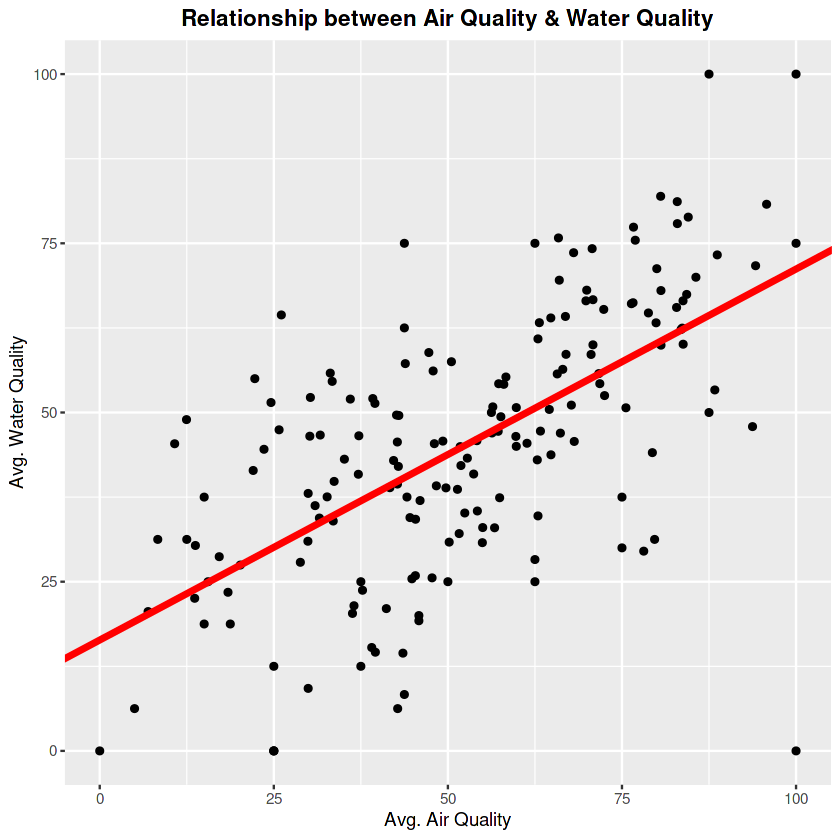

In [8]:
# Finding Linear Relationship

lm(data = average_quality, avg_water_quality~avg_air_quality)

# Do they have linear relationship? If so, is it positive?

average_quality_relationship <- average_quality %>%
ggplot(aes(x = avg_air_quality, y = avg_water_quality)) +
geom_point() +
geom_abline(intercept= 16.3815, slope=0.5482, color= "red", size = 1.5) +
labs(title = "Relationship between Air Quality & Water Quality",
     x = "Avg. Air Quality",
     y = "Avg. Water Quality") +
theme(plot.title = element_text(hjust = 0.5, face = "bold"),
      legend.title = element_text(face = "bold"))

average_quality_relationship

Findings so far:
1. **Avg. Air Quality** and **Avg. Water Quality** somehow have linear relationship and is positive.
2. This shows that they are correlate mostly - however, there are some outliers, such as **Micronesia**.

## Conclusion

1. Third world countries that are suffering from civil wars, such as **Sierra Leone**, **Niger**, **Central African Republic**, and **Benin**, suffer from various pollutions due to their unstability. Also, **Federated State of Micronesia** suffer from water pollution due to its industrial and agricultural development - on the contrary, it has clean air.
2. Many European countries, such as **Norway** and **Finland**, are indicated to have breathable air and clean water.
3. Thus, the third world countries should start stabilizing their government by ending civil war and taking care of their citizens' sanitation by reducing pollutants. **Be eco-friendly and peaceful!**

**Thanks for checking out my humble analysis. :)**

**P.S. This time, I solely used ggplot for this analysis instead of using plotly - please let me know what you guys think!**